# Best results from ensemble models
- Best Performance from - XGBoost
- Best XGB parameters:  {'alpha': 0.5, 'colsample_bytree': 0.55, 'gamma': 0.7, 'lambda': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
                           
                           
- Best XGB Mean Cross-validation score: 0.861413043478261
- XGB Train Performance:  0.9151061173533084
- XGB Test Performance:  0.8333333333333334

# Best result from basic models

- Support Vector Classifier Best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


- Best Mean Cross-validation score: 0.83



- Support Vector Classifier Train Performance:  0.850187265917603
- Support Vector Classifier Test Performance:  0.8555555555555555



- Accuracy: 0.8555555555555555
- F1 score: 0.8169014084507042
- Precision: 0.7435897435897436
- Recall: 0.90625
- ROC_AUC: 0.8669181034482758
- Confusion Matrix:
                     [[48 10]
                     [ 3 29]]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'D:\EverythingDS\DataSets\titanic.csv')

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

PassengerId [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 

Survived [0 1] 

Pclass [3 1 2] 

Name ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima'] 

Sex ['male' 'female'] 

Age [22. 38. 26. 35. nan 54.  2. 27. 14.  4. 58. 20. 39. 55. 31. 34. 15. 28.
  8. 19.] 

SibSp [1 0 3 4 2 5 8] 

Parch [0 1 2 5 3 4 6] 

Ticket ['A/5 21171' 'PC 1

In [6]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' and var!='Survived' and var not in discrete]

# mixed
mixed = ['Cabin']

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' and var not in mixed]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')
print(f'There are {len(mixed)} mixed variables')

There are 3 discrete variables
There are 3 continuous variables
There are 4 categorical variables
There are 1 mixed variables


In [7]:
# missing values
data.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [8]:
# cardinality (number of different categories)

data[categorical+mixed].nunique()

Name        891
Sex           2
Ticket      681
Embarked      3
Cabin       147
dtype: int64

In [9]:
# Cabin- mixed variable
# \d regular expression for digts . \d+ one or more digits
data['Cabin_num'] = data['Cabin'].str.extract('(\d+)') # captures numerical part
data['Cabin_num'] = data['Cabin_num'].astype('float')
data['Cabin_cat'] = data['Cabin'].str[0] # captures the first letter

# show dataframe
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN


In [10]:
data['Title'] = data['Name'].str.split(',').str[1].str.split('\s+').str[1]
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [11]:
data['Title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Sir.           1
Capt.          1
Jonkheer.      1
the            1
Lady.          1
Mme.           1
Ms.            1
Don.           1
Name: Title, dtype: int64

In [12]:
data['Cabin_cat'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_cat, dtype: int64

In [13]:
# drop original mixed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_num,Cabin_cat,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,NaN,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,85.0,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,NaN,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,123.0,C,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN,NaN,Mr.


In [14]:
data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1,inplace=True)

In [15]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
0,0,3,male,22.0,1,0,7.2500,S,NaN,NaN,Mr.
1,1,1,female,38.0,1,0,71.2833,C,85.0,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,NaN,NaN,Miss.
3,1,1,female,35.0,1,0,53.1000,S,123.0,C,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,NaN,NaN,Mr.


In [16]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin_num
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,200.00000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,50.49000
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,35.39497
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,2.00000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.00000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,43.00000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,77.25000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,148.00000


In [17]:
# separate into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Survived', axis=1),  # predictors
    data['Survived'],  # target
    test_size=0.1,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((801, 10), (90, 10))

In [18]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_num,Cabin_cat,Title
815,1,male,NaN,0,0,0.0000,S,102.0,B,Mr.
877,3,male,19.0,0,0,7.8958,S,NaN,NaN,Mr.
193,2,male,3.0,1,1,26.0000,S,2.0,F,Master.
523,1,female,44.0,0,1,57.9792,C,18.0,B,Mrs.
634,3,female,9.0,3,2,27.9000,S,NaN,NaN,Miss.


In [19]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 801 entries, 815 to 684
Data columns (total 10 columns):
Pclass       801 non-null int64
Sex          801 non-null object
Age          643 non-null float64
SibSp        801 non-null int64
Parch        801 non-null int64
Fare         801 non-null float64
Embarked     799 non-null object
Cabin_num    175 non-null float64
Cabin_cat    179 non-null object
Title        801 non-null object
dtypes: float64(3), int64(3), object(4)
memory usage: 68.8+ KB


## Data Preprocessing

In [20]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [21]:
titanic_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_arbit',
     mdi.ArbitraryNumberImputer(arbitrary_number=-1,
                                variables=['Cabin_num'])),
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['Age'])),
    
    ('imputer_cat_freq',
     mdi.FrequentCategoryImputer(variables=['Embarked'])),
    
    ('imputer_cat_missing',
     mdi.CategoricalVariableImputer(variables=['Cabin_cat','Title'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=4,
                                    variables=['Cabin_cat','Title'])),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=['Sex', 'Embarked','Cabin_cat','Title'], # we can select which variables to encode
                               drop_last=True)),

])

In [22]:
titanic_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_arbit',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['Cabin_num'])),
                ('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['Age'])),
                ('imputer_cat_freq',
                 FrequentCategoryImputer(variables=['Embarked'])),
                ('imputer_cat_missing',
                 CategoricalVariableImputer(variables=['Cabin_cat', 'Title'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=4, tol=0.01,
                                             variables=['Cabin_cat', 'Title'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['Sex', 'Embarked',
                                                    

In [23]:
# Apply Transformations
X_train=titanic_pipe.transform(X_train)
X_test=titanic_pipe.transform(X_test)

In [25]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          714 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
Cabin_num    200 non-null float64
Cabin_cat    204 non-null object
Title        891 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 76.7+ KB


In [58]:
#there are numerical features to be scaled

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
titanic_scaler =  Pipeline([
    ('scaler', StandardScaler())
])

In [48]:
titanic_scaler.fit(X_train, y_train)
# Apply Transformations
X_train=titanic_scaler.transform(X_train)
X_test=titanic_scaler.transform(X_test)

In [36]:
X_train.eq(0).any()

Pclass               False
Age                  False
SibSp                 True
Parch                 True
Fare                  True
Cabin_num            False
Sex_male              True
Embarked_S            True
Embarked_C            True
Cabin_cat_B           True
Cabin_cat_Missing     True
Cabin_cat_F           True
Cabin_cat_D           True
Cabin_cat_Rare        True
Cabin_cat_E           True
Cabin_cat_C           True
Title_Mr.             True
Title_Master.         True
Title_Mrs.            True
Title_Miss.           True
dtype: bool

### a) Logistic Regression

In [185]:
#Train a logistic regression model, report the coefficients and model performance 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics

clf = LogisticRegression(random_state=42)
params = {'penalty':['l1','l2'],'dual':[True,False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True,False],
        'solver':['saga','newton-cg', 'lbfgs', 'liblinear', 'sag']}
# params = {'penalty':['l2'],'dual':[False],'C':[0.1], 'fit_intercept':[True],
#         'solver':['saga','newton-cg']}
gridlog = GridSearchCV(clf, params, cv=5, n_jobs=2, scoring='accuracy')
gridlog.fit(X_train, y_train)

cv_scores = cross_val_score(gridlog, X_train, y_train)

#Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

#find best parameters
print('Logistic Regression parameters: ',gridlog.best_params_)
print()

#Check test data set performance
print("Logistic Train Performance: ",gridlog.score(X_train,y_train))
print("Logistic Test Performance: ",gridlog.score(X_test,y_test))
print()

#Metrics
prediction = gridlog.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

Mean Cross-validation scores: 0.8214984472049689

Logistic Regression parameters:  {'C': 0.1, 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

Logistic Train Performance:  0.8252184769038702
Logistic Test Performance:  0.8222222222222222

Accuracy: 0.8222222222222222
F1 score: 0.7894736842105263
Precision: 0.7692307692307693
Recall: 0.8108108108108109
ROC_AUC: 0.820499745028047
Confusion Matrix:
 [[44  9]
 [ 7 30]]


### b) KNN Classifier

In [190]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define a list of parameters

param_knn = {'n_neighbors': range(5,25), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights':['uniform','distance']}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN Best parameters: ',gridlog.best_params_)
print()

#Check test data set performance
print("KNN Train Performance: ",grid_knn.score(X_train,y_train))
print("KNN Test Performance: ",grid_knn.score(X_test,y_test))
print()

#Metrics
prediction = grid_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

Best Mean Cross-validation score: 0.73

KNN Best parameters:  {'C': 0.1, 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

KNN Train Performance:  0.9862671660424469
KNN Test Performance:  0.8111111111111111

Accuracy: 0.8111111111111111
F1 score: 0.7848101265822786
Precision: 0.7948717948717948
Recall: 0.775
ROC_AUC: 0.8075
Confusion Matrix:
 [[42  8]
 [ 9 31]]


In [50]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(random_state=42)

# define a list of parameters

param_knn = {'n_neighbors': range(5,25), 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'weights':['uniform','distance']}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN Best parameters: ',grid_knn.best_params_)
print()

#Check test data set performance
print("KNN Train Performance: ",grid_knn.score(X_train,y_train))
print("KNN Test Performance: ",grid_knn.score(X_test,y_test))
print()

#Metrics
prediction = grid_knn.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

Best Mean Cross-validation score: 0.82

KNN Best parameters:  {'C': 0.1, 'dual': False, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'saga'}

KNN Train Performance:  0.83645443196005
KNN Test Performance:  0.8666666666666667

Accuracy: 0.8666666666666667
F1 score: 0.8378378378378378
Precision: 0.7948717948717948
Recall: 0.8857142857142857
ROC_AUC: 0.87012987012987
Confusion Matrix:
 [[47  8]
 [ 4 31]]


### c) Decision Tree Classifier

In [221]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {"max_depth": [2,3,4,5],
           "min_samples_split": [2,3,4],
           "max_leaf_nodes": [2,3,4,5],
           "criterion":['gini'],
           "splitter":['best','random']}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree Best parameters: ',grid_dtree.best_params_)
print()

#Check test data set performance
print("Decision Tree Train Performance: ",grid_dtree.score(X_train,y_train))
print("Decision Tree Test Performance: ",grid_dtree.score(X_test,y_test))
print()

#Metrics
prediction = grid_dtree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

Best Mean Cross-validation score: 0.82

Decision Tree Best parameters:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4, 'min_samples_split': 2, 'splitter': 'best'}

Decision Tree Train Performance:  0.8239700374531835
Decision Tree Test Performance:  0.8111111111111111

Accuracy: 0.8111111111111111
F1 score: 0.7792207792207793
Precision: 0.7692307692307693
Recall: 0.7894736842105263
ROC_AUC: 0.8081983805668016
Confusion Matrix:
 [[43  9]
 [ 8 30]]


### d) Linear SVC

In [ ]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC(random_state=42)
param = [{'penalty':['l2'], 'C': [0.001, 0.01, 0.1], 'loss':['hinge','squared_hinge']}]

svc_grid = GridSearchCV(lsvc, param, cv=5,return_train_score=True,scoring='accuracy')
svc_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svc_grid.best_score_))
print()

#find best parameters
print('Decision Tree Best parameters: ',svc_grid.best_params_)
print()

#Check test data set performance
print("Decision Tree Train Performance: ",svc_grid.score(X_train,y_train))
print("Decision Tree Test Performance: ",svc_grid.score(X_test,y_test))
print()

#Metrics
prediction = svc_grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

### e) Support Vector Classifier

In [240]:
from sklearn.svm import SVC
svc = SVC(random_state=44)
param_grid = {'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svm_grid = GridSearchCV(svc, param_grid, cv=5,return_train_score=True,scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svm_grid.best_score_))
print()

#find best parameters
print('Support Vector Classifier Best parameters: ',svm_grid.best_params_)
print()

#Check test data set performance
print("Support Vector Classifier Train Performance: ",svm_grid.score(X_train,y_train))
print("Support Vector Classifier Test Performance: ",svm_grid.score(X_test,y_test))
print()

#Metrics
prediction = svm_grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

Best Mean Cross-validation score: 0.79

Support Vector Classifier Best parameters:  {'C': 100, 'kernel': 'rbf'}

Support Vector Classifier Train Performance:  0.8451935081148564
Support Vector Classifier Test Performance:  0.8222222222222222

Accuracy: 0.8222222222222222
F1 score: 0.8
Precision: 0.8205128205128205
Recall: 0.7804878048780488
ROC_AUC: 0.818815331010453
Confusion Matrix:
 [[42  7]
 [ 9 32]]


In [57]:
from sklearn.svm import SVC
svc = SVC()
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['poly'],
               'degree': [2, 3, 4, 5, 6]},
              {'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]
svm_grid = GridSearchCV(svc, param_grid, cv=5,return_train_score=True,scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svm_grid.best_score_))
print()

#find best parameters
print('Support Vector Classifier Best parameters: ',svm_grid.best_params_)
print()

#Check test data set performance
print("Support Vector Classifier Train Performance: ",svm_grid.score(X_train,y_train))
print("Support Vector Classifier Test Performance: ",svm_grid.score(X_test,y_test))
print()

#Metrics
prediction = svm_grid.predict(X_test)
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("F1 score:",metrics.f1_score(prediction,y_test))
print("Precision:",metrics.precision_score(prediction,y_test))
print("Recall:",metrics.recall_score(prediction,y_test))
print("ROC_AUC:",metrics.roc_auc_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction, y_test))

Best Mean Cross-validation score: 0.83

Support Vector Classifier Best parameters:  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

Support Vector Classifier Train Performance:  0.850187265917603
Support Vector Classifier Test Performance:  0.8555555555555555

Accuracy: 0.8555555555555555
F1 score: 0.8169014084507042
Precision: 0.7435897435897436
Recall: 0.90625
ROC_AUC: 0.8669181034482758
Confusion Matrix:
 [[48 10]
 [ 3 29]]


## Ensemble Models

#### Bagging with Decision Tree

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [112]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=False)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}

bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [113]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
# print(bag_dtree1.oob_score_)

Best Mean Cross Validation Score is 0.8402096273291926
Best Mean Cross Validation Score is {'base_estimator__max_depth': 9, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9413233458177278
Test score is 0.8


##### When using oob=True

In [ ]:
# With OOB = True
bag_dtree2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree2_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}

bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True)
bag_dtree2_grid.fit(X_train,y_train)
bag_dtree2.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree2.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2.score(X_test,y_test)}')

In [121]:
print(f'OOB score is {bag_dtree2.oob_score_}')

OOB score is 0.7827715355805244


#### Bagging with SVC

In [88]:
from sklearn.svm import SVC
bag_svc1 = BaggingClassifier(base_estimator=SVC(C=10,gamma=0.01,kernel='rbf'), bootstrap=True, random_state=0, oob_score=False)

bag_svc1.fit(X_train, y_train)

#Check test data set performance
print("Support Vector Classifier Train Performance: ",bag_svc1.score(X_train,y_train))
print("Support Vector Classifier Test Performance: ",bag_svc1.score(X_test,y_test))
print()

Support Vector Classifier Train Performance:  0.8813982521847691
Support Vector Classifier Test Performance:  0.8



In [63]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [254]:
from sklearn.svm import SVC
bag_svc1 = BaggingClassifier(base_estimator=SVC(), bootstrap=True, random_state=0, oob_score=False)

param_grid =  [{'base_estimator__kernel': ['rbf'],
            'base_estimator__C': [0.01, 0.1, 1, 10, 100],
            'base_estimator__gamma': [0.01, 0.1, 1],
            'n_estimators': [10,25,100]},
             {'base_estimator__kernel': ['poly'],
               'base_estimator__degree': [2, 3],
               'n_estimators': [10,25,100]}]

svm_grid_bag = GridSearchCV(bag_svc1, param_grid, cv=5,return_train_score=True,scoring='accuracy')
svm_grid_bag.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(svm_grid_bag.best_score_))
print()

#find best parameters
print('Support Vector Classifier Best parameters: ',svm_grid_bag.best_params_)
print()

#Check test data set performance
print("Support Vector Classifier Train Performance: ",svm_grid_bag.score(X_train,y_train))
print("Support Vector Classifier Test Performance: ",svm_grid_bag.score(X_test,y_test))
print()

Best Mean Cross-validation score: 0.77

Support Vector Classifier Best parameters:  {'base_estimator__C': 10, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf', 'n_estimators': 25}

Support Vector Classifier Train Performance:  0.8976279650436954
Support Vector Classifier Test Performance:  0.8111111111111111



##### Using OOB = True

In [207]:
from sklearn.svm import SVC
bag_svc2 = BaggingClassifier(base_estimator=SVC(C=10,gamma=0.01,kernel='rbf'), 
                             n_estimators= 25, bootstrap=True, random_state=0, oob_score=True)

bag_svc2.fit(X_train, y_train)

#Check test data set performance
print("Support Vector Classifier Train Performance: ",bag_svc2.score(X_train,y_train))
print("Support Vector Classifier Test Performance: ",bag_svc2.score(X_test,y_test))
print(f'OOB score is {bag_svc2.oob_score_}')
print()

Support Vector Classifier Train Performance:  0.8976279650436954
Support Vector Classifier Test Performance:  0.8111111111111111
OOB score is 0.7715355805243446



#### Pasting with Decision Tree

In [94]:
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True)
paste_dtree1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402018633540372
Best Mean Cross Validation Score is {'base_estimator__max_depth': 8, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9288389513108615
Test score is 0.8


#### Pasting with SVC

In [213]:
from sklearn.svm import SVC
bag_svc1 = BaggingClassifier(base_estimator=SVC(), bootstrap=False, random_state=0, oob_score=False)

param_grid =  [{'base_estimator__kernel': ['rbf'],
            'base_estimator__C': [0.01, 0.1, 1, 10, 100],
            'base_estimator__gamma': [0.01, 0.1, 1],
            'n_estimators': [10,25,100]},
             {'base_estimator__kernel': ['poly'],
               'base_estimator__degree': [2, 3],
               'n_estimators': [10,25,100]}]

paste_svm_grid = GridSearchCV(bag_svc1, param_grid, cv=5,return_train_score=True,scoring='accuracy')
paste_svm_grid.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(paste_svm_grid.best_score_))
print()

#find best parameters
print('Support Vector Classifier Best parameters: ',paste_svm_grid.best_params_)
print()

#Check test data set performance
print("Support Vector Classifier Train Performance: ",paste_svm_grid.score(X_train,y_train))
print("Support Vector Classifier Test Performance: ",paste_svm_grid.score(X_test,y_test))
print()

Best Mean Cross-validation score: 0.76

Support Vector Classifier Best parameters:  {'base_estimator__C': 100, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf', 'n_estimators': 10}

Support Vector Classifier Train Performance:  0.920099875156055
Support Vector Classifier Test Performance:  0.8



#### Random Forest

In [135]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
#     ,'min_samples_split':[2,5,10]
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8826466916354557
Test score is 0.8222222222222222


In [149]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42, oob_score=False)
rfc_param = { 
    'n_estimators': [231, 232, 233],
    'max_features': ['auto'],
    'max_depth' : [7,8],
    'criterion' :['entropy'],
    'min_samples_split':[5,6,7,8],
    'min_samples_leaf':[1]
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 232}
Train score is 0.8726591760299626
Test score is 0.8333333333333334


In [214]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8402173913043478
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 232}
Train score is 0.8726591760299626
Test score is 0.8333333333333334


##### Using OOB

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(criterion = 'entropy', max_depth= 7, max_features= 'auto', 
                            min_samples_leaf= 1, min_samples_split= 6, n_estimators = 232, random_state=42, oob_score=True)

rfc.fit(X_train,y_train)

print(f'Train score is {rfc.score(X_train,y_train)}')
print(f'Test score is {rfc.score(X_test,y_test)}')
print(f'OOB score is {rfc.oob_score_}')

Train score is 0.8726591760299626
Test score is 0.8333333333333334
OOB score is 0.8302122347066168


#### Extra-Trees

In [150]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [233, 234, 235, 236, 237],
    'max_features': ['auto'],
    'max_depth' : [7,8,9,10,11],
    'criterion' :['entropy'],
    'min_samples_split':[2,3],
    'min_samples_leaf':[1,2,3]
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8339829192546585
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 235}
Train score is 0.8776529338327091
Test score is 0.8333333333333334


#### Ada Boost

In [159]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["entropy"],
              'base_estimator__splitter' :   ["random"],
              'base_estimator__max_depth' : [1,2],
              'base_estimator__min_samples_split':[2],
              'base_estimator__min_samples_leaf':[1,2,3],
              'algorithm' : ['SAMME', 'SAMME.R'],
              'n_estimators' : [20,22,25,50],
              'learning_rate' : [0.6, 0.7, 0.8,1],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Params {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8377406832298137
Best Params {'algorithm': 'SAMME', 'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__splitter': 'random', 'learning_rate': 1, 'n_estimators': 22}
Train score is 0.8377028714107366
Test score is 0.8444444444444444


In [ ]:
lr = 0.8 n_est = 25

Best Mean Cross Validation Score is 0.8202173913043479
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__splitter': 'random', 'learning_rate': 1, 'n_estimators': 50}
Train score is 0.8976279650436954
Test score is 0.8555555555555555

Best Mean Cross Validation Score is 0.8202173913043479
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 2, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 2, 'base_estimator__splitter': 'random', 'learning_rate': 1, 'n_estimators': 50}
Train score is 0.8976279650436954
Test score is 0.8555555555555555


#### AdaBoost with SVC

In [163]:
adc_svc =AdaBoostClassifier(base_estimator=SVC(),random_state=42)

adc_svc_param = [{
            'base_estimator__kernel': ['rbf'],
            'base_estimator__C': [9,10,11],
            'base_estimator__gamma': [0.01, 0.1],
            'algorithm' : ['SAMME'],
            'n_estimators' : [40,50,60],
            'learning_rate' : [0.4,0.5,0.6]
                 }]
                
adc_svc_grid = GridSearchCV(adc_svc, adc_svc_param,cv=5, return_train_score=True)
adc_svc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_score_}')
print(f'Best Params {adc_svc_grid.best_params_}')
print(f'Train score is {adc_svc_grid.score(X_train,y_train)}')
print(f'Test score is {adc_svc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6317236024844719
Best Params {'algorithm': 'SAMME', 'base_estimator__C': 11, 'base_estimator__gamma': 0.01, 'base_estimator__kernel': 'rbf', 'learning_rate': 0.4, 'n_estimators': 40}
Train score is 0.6317103620474407
Test score is 0.5666666666666667


#### Gradient Boost

In [173]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'min_samples_split':[4,5,6],
              'subsample':[0.6,0.8,1],
              'min_samples_leaf':[1,2],
              'max_depth' : [3,4,5],
#               'max_features':['auto'],
              'n_estimators' : [26,27,28],
              'learning_rate' : [0.1,0.015,0.2,0.3],
              'warm_start' : [True]
             }

gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Params are {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8551630434782609
Best Params are {'learning_rate': 0.2, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 27, 'subsample': 1, 'warm_start': True}
Train score is 0.9213483146067416
Test score is 0.8222222222222222


#### XGBoost

In [166]:
pip install xgboost

  Using cached https://files.pythonhosted.org/packages/b1/11/cba4be5a737c6431323b89b5ade818b3bbe1df6e8261c6c70221a767c5d9/xgboost-1.0.2-py3-none-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


In [167]:
from xgboost import XGBClassifier

In [189]:
from  xgboost import XGBClassifier

xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [3,4,5],
              'n_estimators' : [90,100,110], #further tune?
              'learning_rate' : [0.15,0.2,0.25],
              'gamma' : [0.6,0.7,0.9],
              'min_child_weight' : [1,2],
              'subsample':[0.5,0.6,0.7,1],
              'colsample_bytree':[0.55,0.57,0.59],
              'lambda':[0.3,0.5,0.7],
              'alpha':[0.4,0.5,0.6]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Params are {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.861413043478261
Best Params are {'alpha': 0.5, 'colsample_bytree': 0.55, 'gamma': 0.7, 'lambda': 0.5, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.6}
Train score is 0.9151061173533084
Test score is 0.8333333333333334


#### Summary

In [255]:
classifiers={'knn':grid_knn,
             'logreg':gridlog,
             'dtree':grid_dtree,
             'lin_svc':svc_grid,
             'svc':svm_grid,
             'bag_dtree_oobF':bag_dtree1_grid,
             'bag_dtree_oobT':bag_dtree2_grid,
             'bag_svc1':svm_grid_bag,
             'pst_dtree':paste_dtree1_grid,
             'pst_svc':svm_grid_paste,
             'rfc':rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'adc_svc':adc_svc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [256]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'dtree', 'lin_svc', 'svc', 'bag_dtree_oobF', 'bag_dtree_oobT', 'bag_svc1', 'pst_dtree', 'pst_svc', 'rfc', 'etc', 'adc_dtree', 'adc_svc', 'gbc', 'xgbc'])

In [258]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [259]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])
# Show the accuracy dataframe
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
15,xgbc,0.861413,0.009323
14,gbc,0.855163,0.022945
10,rfc,0.840217,0.017764
5,bag_dtree_oobF,0.840210,0.019516
6,bag_dtree_oobT,0.840210,0.019516
8,pst_dtree,0.840202,0.028103
12,adc_dtree,0.837741,0.028519
11,etc,0.833983,0.019756
2,dtree,0.821506,0.031552
1,logreg,0.821498,0.026499


In [261]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_
    
    # Predict test labels
    predictions = best_model.predict(X_test)
    
    # Save predictions to a list
    predictions_all[key] = predictions

In [262]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

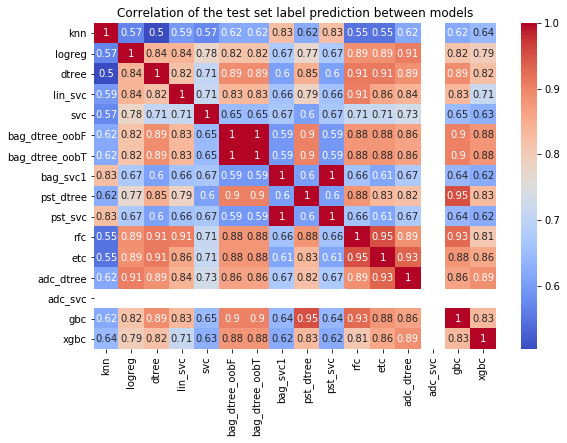

In [263]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [265]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

In [266]:
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [269]:
print("Least Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Least Absolute Correlations
knn  dtree     0.503027
     etc       0.548322
     rfc       0.548322
     logreg    0.570591
     svc       0.573711
dtype: float64


### Voting

In [271]:
adc_svc_grid.best_estimator_

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=11, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma=0.01, kernel='rbf', max_iter=-1,
                                      probability=False, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.4, n_estimators=40, random_state=42)

#### Voting Top 5

In [272]:
from sklearn.ensemble import VotingClassifier

In [309]:
vclf1 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
                               ('adc_dtree', adc_dtree_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True)
vclf1_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(alpha=0.5,
                                                                   base_score=0.5,
                                                                   booster=None,
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=0.55,
                                                                   early_stopping_rounds=2,
                                                                   gamma=0.7,
                                                                   gpu_id=-1,
                                                                   importance_type='gain',
                                                         

In [310]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8526863354037267
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.9026217228464419
Test score is 0.8333333333333334


In [298]:
vclf2 = VotingClassifier(estimators=
                             [ ('xgbc', xgbc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
                               ('etc', etc_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_)
                              ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True)
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(alpha=0.5,
                                                                   base_score=0.5,
                                                                   booster=None,
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=0.55,
                                                                   early_stopping_rounds=2,
                                                                   gamma=0.7,
                                                                   gpu_id=-1,
                                                                   importance_type='gain',
                                                         

In [299]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8551630434782609
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.898876404494382
Test score is 0.8555555555555555


#### Voting Least Correlated

In [ ]:
classifiers={'knn':grid_knn,
             'logreg':gridlog,
             'dtree':grid_dtree,
             'lin_svc':svc_grid,
             'svc':svm_grid,
             'bag_dtree_oobF':bag_dtree1_grid,
             'bag_dtree_oobT':bag_dtree2_grid,
             'bag_svc1':svm_grid_bag,
             'pst_dtree':paste_dtree1_grid,
             'pst_svc':svm_grid_paste,
             'rfc':rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'adc_svc':adc_svc_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [307]:
vclf3 = VotingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_),
                              ('etc',etc_grid),
                               ('rfc',rfc_grid),
#                                ('svc', svm_grid.best_estimator_), 
                               ('logreg', gridlog.best_estimator_), 
#                                ('adc_svc', adc_svc_grid.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True)
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('xgbc',
                                                     XGBClassifier(alpha=0.5,
                                                                   base_score=0.5,
                                                                   booster=None,
                                                                   colsample_bylevel=1,
                                                                   colsample_bynode=1,
                                                                   colsample_bytree=0.55,
                                                                   early_stopping_rounds=2,
                                                                   gamma=0.7,
                                                                   gpu_id=-1,
                                                                   importance_type='gain',
                                                         

In [308]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8489363354037266
Best Mean Cross Validation Score is {'voting': 'soft'}
Train score is 0.885143570536829
Test score is 0.8333333333333334


### Stacking

In [311]:
from sklearn.ensemble import StackingClassifier

#### Stacking Top 5

In [324]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
#                                ('adc_dtree', adc_dtree_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_)
                              ], final_estimator=LogisticRegression(), cv=3)
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True)
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('xgbc',
                                                       XGBClassifier(alpha=0.5,
                                                                     base_score=0.5,
                                                                     booster=None,
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=0.55,
                                                                     early_stopping_rounds=2,
                                                                     gamma=0.7,
                                                                     gpu_id=-1,
                                                                     importance_

In [325]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Params are {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8464285714285713
Best Params are {'final_estimator__C': 0.2, 'stack_method': 'auto'}
Train score is 0.9126092384519351
Test score is 0.8444444444444444


In [327]:
sclf1 = StackingClassifier(estimators=
                              [('xgbc', xgbc_grid.best_estimator_), 
                               ('gbc', gbc_grid.best_estimator_), 
#                                ('adc_dtree', adc_dtree_grid.best_estimator_),
                               ('etc', etc_grid.best_estimator_),
                               ('rfc', rfc_grid.best_estimator_)
                              ], final_estimator=XGBClassifier(alpha= 0.5, colsample_bytree= 0.55, gamma= 0.7,
                                                               learning_rate= 0.2, max_depth= 4, 
                                                               min_child_weight= 1, n_estimators= 100, subsample= 0.6), cv=3)
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True)
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('xgbc',
                                                       XGBClassifier(alpha=0.5,
                                                                     base_score=0.5,
                                                                     booster=None,
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=0.55,
                                                                     early_stopping_rounds=2,
                                                                     gamma=0.7,
                                                                     gpu_id=-1,
                                                                     importance_

In [328]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Params are {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8327251552795032
Best Params are {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.8863920099875156
Test score is 0.7888888888888889


#### Stacking Least Correlated

In [330]:
sclf2 = StackingClassifier(estimators=
                              [
                           ('xgbc', xgbc_grid.best_estimator_),
                               ('etc',etc_grid),
#                                ('rfc',rfc_grid),
                               ('svc', svm_grid.best_estimator_), 
#                                ('logreg', gridlog.best_estimator_), 
#                                ('adc_svc', adc_svc_grid.best_estimator_),
                              ], final_estimator=LogisticRegression(), cv=3)
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True)
sclf2_grid.fit(X_train,y_train)

C:\Users\srish\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator svc does not implement the method predict_proba.

  FitFailedWarning)
C:\Users\srish\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator svc does not implement the method predict_proba.

  FitFailedWarning)
C:\Users\srish\Anaconda3\envs\buan6341_2020\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Underlying estimator svc does not implement the method predict_proba.

  F

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=3,
                                          estimators=[('xgbc',
                                                       XGBClassifier(alpha=0.5,
                                                                     base_score=0.5,
                                                                     booster=None,
                                                                     colsample_bylevel=1,
                                                                     colsample_bynode=1,
                                                                     colsample_bytree=0.55,
                                                                     early_stopping_rounds=2,
                                                                     gamma=0.7,
                                                                     gpu_id=-1,
                                                                     importance_

In [331]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Params are {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.8327251552795032
Best Params are {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.8863920099875156
Test score is 0.7888888888888889
